In [3]:
import pandas as pd
import gzip
import ast
import json
#from funciones import missing_values_table
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import warnings

# Funciones

In [2]:
def missing_values_table(df):
    '''
    Se pasa como parametro un df de pandas, devuelve la 
    cantidad de valores NaN y a que porcentaje del total de valores corresponen
    
    '''
    
    mis_val = df.isna().sum()
    mis_val_percent = 100 * df.isna().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

# 1 Extraccion

GAMES

In [3]:
# Lista para almacenar los datos JSON
datos = []

# Abrir el archivo comprimido y descomprimirlo
with gzip.open(r'./Dataset/steam_games.json.gz', 'rt', encoding='utf-8') as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        datos.append(objeto_json)

df_games=pd.DataFrame(datos)

In [4]:
df_games.tail()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"
120444,NaN,NaN,Maze Run VR,NaN,http://store.steampowered.com/app/681550/Maze_...,NaN,"[Early Access, Adventure, Indie, Action, Simul...",http://steamcommunity.com/app/681550/reviews/?...,"[Single-player, Stats, Steam Leaderboards, HTC...",4.99,True,681550,NaN


In [5]:
df_games.to_csv('./games.csv', index=False)

In [6]:
df_items = pd.read_csv(r"items.csv")
df_reviews = pd.read_csv(r"reviews.csv")
df_games = pd.read_csv(r"games.csv")

C:\Users\rodrigo\AppData\Local\Temp\ipykernel_16112\3245143393.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_items = pd.read_csv(r"items.csv")
C:\Users\rodrigo\AppData\Local\Temp\ipykernel_16112\3245143393.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games = pd.read_csv(r"games.csv")


items

In [11]:
print(df_items.shape)
df_items.info()

(5153209, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 5153209 entries, 0 to 5170013
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       float64
 2   steam_id          float64
 3   user_url          object 
 4   item_id           float64
 5   item_name         object 
 6   playtime_forever  float64
 7   playtime_2weeks   float64
dtypes: float64(5), object(3)
memory usage: 353.8+ MB


In [8]:
#chequeamos los valores unicos para hacer replace() y poder cambiar el tipo de datos a uno manipulable.
print(pd.unique(df_items['item_id']))

[1.0000e+01 2.0000e+01 3.0000e+01 ... 3.5428e+05 4.3392e+05 4.8527e+05]


In [9]:
# Elimina filas con valores nulos en la columna 'nombre_de_la_columna'
df_items = df_items.dropna(subset=['item_id'])

In [10]:
missing_values_table(df_items)

Your selected dataframe has 8 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
user_id,5065033,98.3
items_count,5065033,98.3
steam_id,5065033,98.3
user_url,5065033,98.3


(10978, 8)
10978


<Axes: >

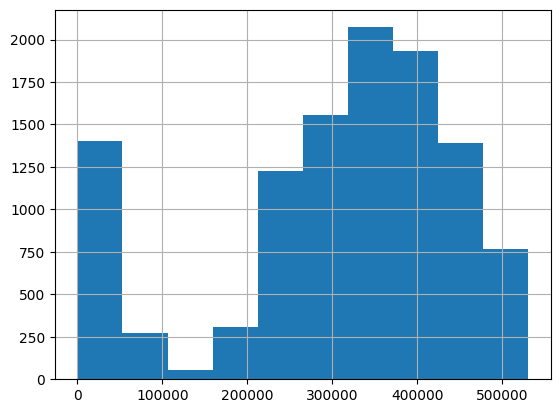

In [35]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores únicos en la columna 'user_id':
unique_count = df_items['item_id'].nunique()
print(df_items.shape)
print(unique_count)
df_items['item_id'].hist()

In [34]:
df_items = df_items.drop_duplicates(subset=['item_id'])#df_items['item_id'].drop_duplicates(inplace=True)

reviews

In [36]:
print(df_reviews.shape)
df_reviews.info()

(59305, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 59332
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             25790 non-null  object 
 1   user_url            25790 non-null  object 
 2   funny               8151 non-null   object 
 3   posted              59305 non-null  object 
 4   last_edited         6140 non-null   object 
 5   item_id             59305 non-null  float64
 6   helpful             59305 non-null  object 
 7   recommend           59305 non-null  object 
 8   sentiment_analysis  59305 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 4.5+ MB


In [37]:
#chequeamos los valores unicos para hacer replace() y poder cambiar el tipo de datos a uno manipulable.
print(pd.unique(df_reviews['item_id']))

[  1250.  22200.  43110. ... 220090. 262850. 431510.]


In [39]:
# Elimina filas con valores nulos en la columna 'nombre_de_la_columna'
df_reviews = df_reviews.dropna(subset=['item_id'])

In [41]:
missing_values_table(df_reviews)

Your selected dataframe has 9 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
last_edited,53165,89.6
funny,51154,86.3
user_id,33515,56.5
user_url,33515,56.5


(3682, 9)
3682


<Axes: >

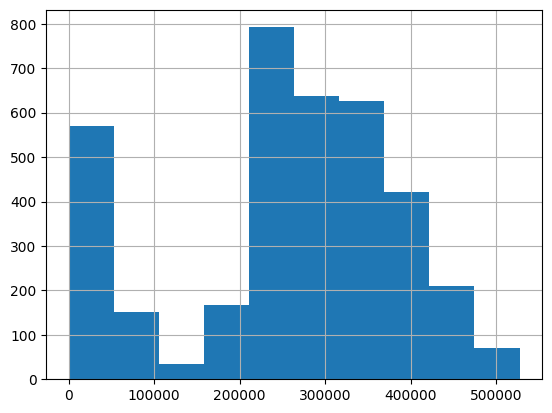

In [44]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores únicos en la columna 'user_id':
unique_count = df_reviews['item_id'].nunique()
print(df_reviews.shape)
print(unique_count)
df_reviews['item_id'].hist()

In [43]:
df_reviews = df_reviews.drop_duplicates(subset=['item_id'])#df_reviews['item_id'].drop_duplicates(inplace=True)

games

In [45]:
print(df_games.shape)
df_games.info()

(32133, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24063 non-null  object 
 1   genres        28851 non-null  object 
 2   app_name      32132 non-null  object 
 3   title         30084 non-null  object 
 4   url           32133 non-null  object 
 5   release_date  30067 non-null  object 
 6   tags          31971 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31464 non-null  object 
 9   price         30756 non-null  object 
 10  early_access  32133 non-null  object 
 11  item_id       32133 non-null  float64
 12  developer     28835 non-null  object 
dtypes: float64(1), object(12)
memory usage: 3.4+ MB


In [46]:
df_games.rename(columns = {'id':'item_id'}, inplace = True)
df_games['item_id'] = pd.to_numeric(df_games['item_id'], errors='coerce')
df_games['item_id'] = df_games['item_id'].astype(float) # Convierto a tipo entero
#chequeamos los valores unicos para hacer replace() y poder cambiar el tipo de datos a uno manipulable.
print(pd.unique(df_games['item_id']))

[761140. 643980. 670290. ... 610660. 658870. 681550.]


In [47]:
# Elimina filas con valores nulos en la columna 'nombre_de_la_columna'
df_games = df_games.dropna(subset=['item_id'])

In [49]:
missing_values_table(df_games)

Your selected dataframe has 13 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
publisher,8070,25.1
developer,3298,10.3
genres,3282,10.2
release_date,2066,6.4
title,2049,6.4
price,1377,4.3
specs,669,2.1
tags,162,0.5
app_name,1,0.0


(32132, 13)
32132


<Axes: >

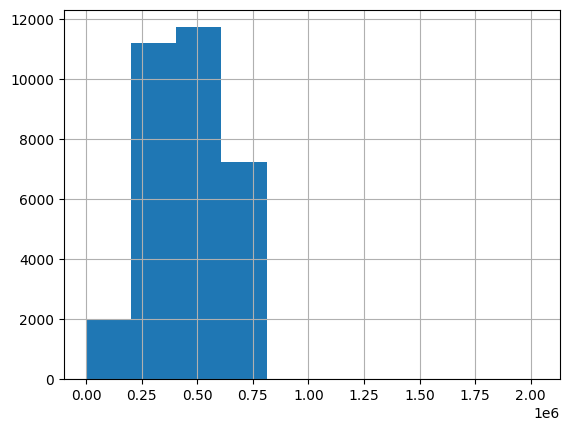

In [52]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores únicos en la columna 'user_id':
unique_count = df_games['item_id'].nunique()
print(df_games.shape)
print(unique_count)
df_games['item_id'].hist()

In [51]:
df_games = df_games.drop_duplicates(subset=['item_id'])#df_games['item_id'].drop_duplicates(inplace=True)

# Combinar datos

In [54]:
# Realiza un join con intersección basado en la columna "clave_comun"
df_interseccion = pd.merge(df_games, df_reviews, on='item_id')
df_interseccion.shape

(3195, 21)

In [55]:
# Realiza un join con intersección basado en la columna "clave_comun"
df_total = pd.merge(df_items,df_interseccion,  on='item_id', how='inner')

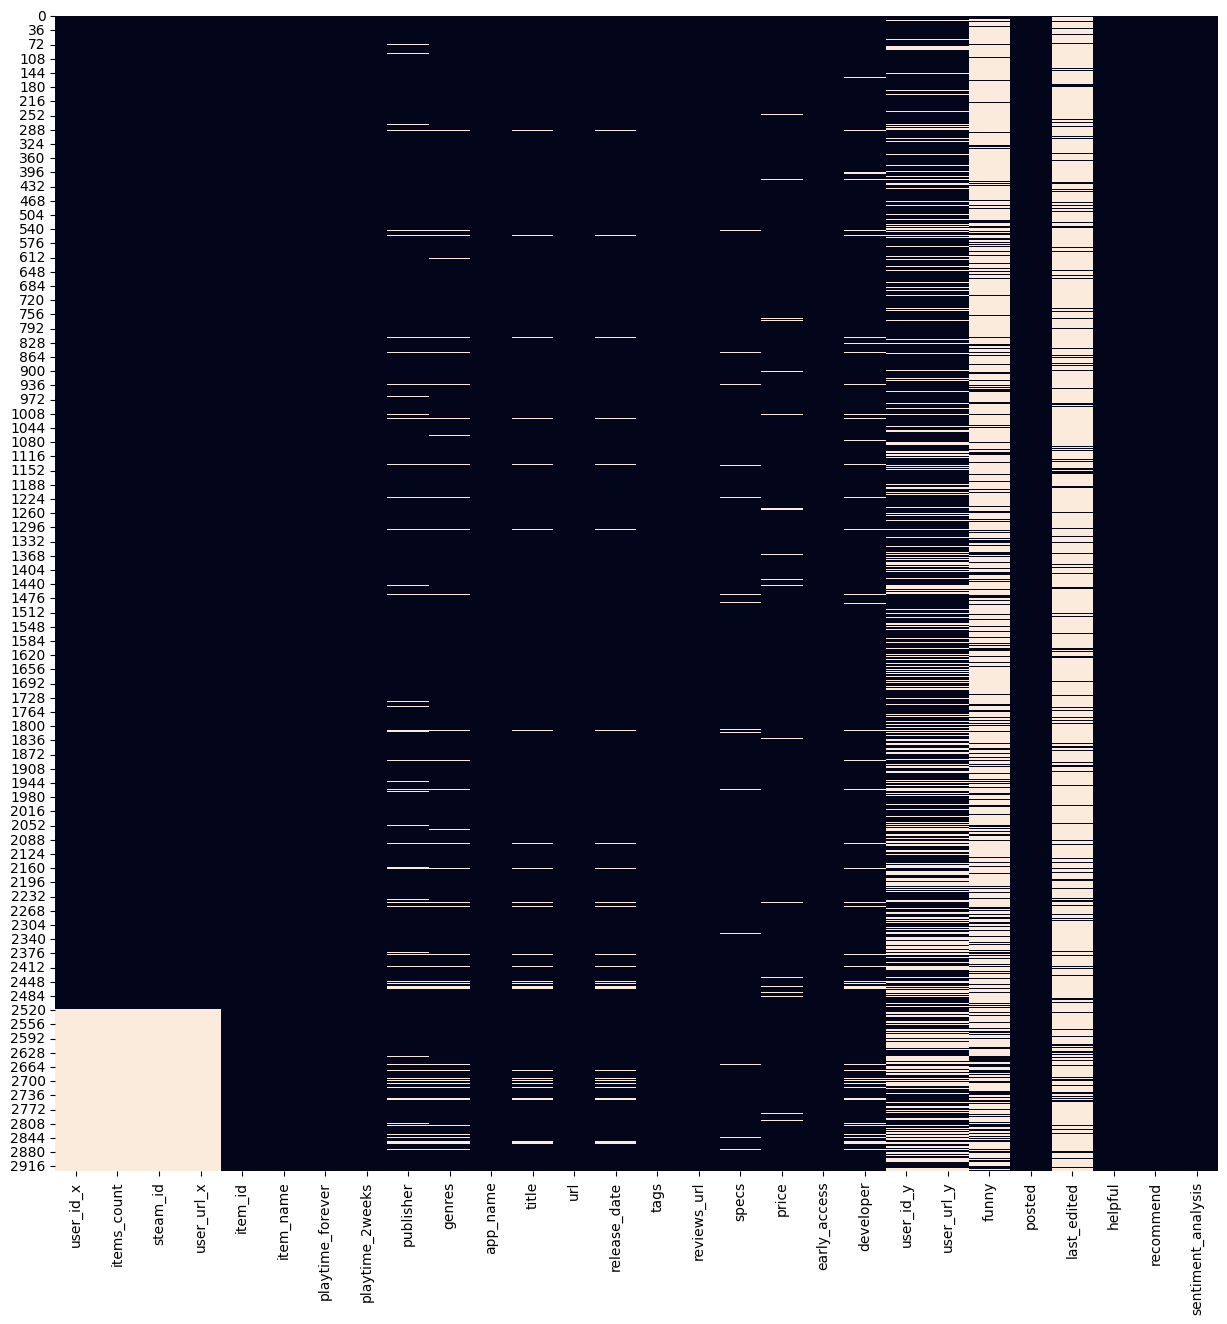

In [56]:
# Reemplazar todos los valores NaN por nan
df_total = df_total.fillna(np.nan)
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_total.isnull(), cbar=False)
plt.show()

(2928, 28)
2928


<Axes: >

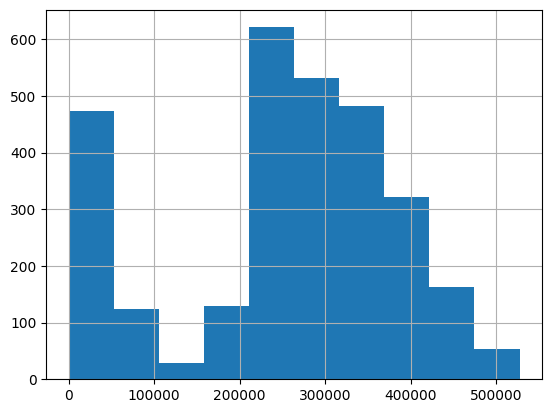

In [57]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores únicos en la columna 'user_id':
unique_count = df_total['item_id'].nunique()
print(df_total.shape)
print(unique_count)
df_total['item_id'].hist()

ELIMINO algunas columnas que no se usara y tambien RENOMBRARE

In [90]:
df_total = df_total.rename(columns={'user_id_x': 'user_id'})

In [60]:
columnas=['user_url_x','playtime_2weeks','url','user_id_y','last_edited','helpful']
df_total = df_total.drop(columnas, axis=1)
df_total.dropna(how='all',inplace=True)
df_total.reset_index(drop=True)

KeyError: "['user_url_x', 'playtime_2weeks', 'url', 'user_id_y', 'last_edited', 'helpful'] not found in axis"

# Guardas datos

In [61]:
df_total.to_csv('./df_total.csv', index=False)

## Funcion 1
def developer( desarrollador : str ): Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora. Ejemplo de retorno:

### Transformacion

PRICE float

In [62]:
print('cantidad de nulos: ',df_total['price'].isnull().sum())
print('tipo de dato: ',df_total['price'].dtype)
print('cantidad datos',df_total.shape)
df_total['price'].iloc[20]

cantidad de nulos:  48
tipo de dato:  object
cantidad datos (2928, 22)


'9.99'

normalizamos

In [65]:
#chequeamos los valores unicos para hacer replace() y poder cambiar el tipo de datos a uno manipulable.
print(pd.unique(df_total['price']))

['9.99' '4.99' '19.99' '6.99' nan '7.99' '2.99' '14.99' '0.00' '54.99'
 '29.99' '39.99' '24.99' '1.99' '11.99' '0.49' '0.98' '0.99' '59.99'
 '3.99' '74.76' '32.99' '12.99' '49.99' '5.99' '13.98' '8.99' '13.99'
 '34.99' '12.89' '20.0' '14.95' '15.99' '18.99' '17.99' '160.91' '59.95'
 '44.99' '3.49' '1.87' '23.99' '21.99' '15.0' '189.96' '139.92' '23.96'
 '16.99' '7.49' '19.98' '69.99' '16.06' '13.37' '79.99' '10.99' '771.71'
 '99.99' '3.0']


In [64]:
df_total.replace(['Free','Free To Play', 'Free to Play', 'Third-party',  'Install Now',
                  'Play WARMACHINE: Tactics Demo', 'Free Movie','Free to Use','Play for Free!','Free Mod','Free HITMAN™ Holiday Pack','Play the Demo'], '0.00', inplace=True)

In [66]:
#consola, no video juego
df_total[df_total['price'] == 'Starting at $499.00']

,user_id_x,items_count,steam_id,item_id,item_name,playtime_forever,publisher,genres,app_name,title,...,reviews_url,specs,price,early_access,developer,user_url_y,funny,posted,recommend,sentiment_analysis


In [69]:
#tampoco es un juego, es otra consola
df_total[df_total['price'] == np.nan]

,user_id_x,items_count,steam_id,item_id,item_name,playtime_forever,publisher,genres,app_name,title,...,reviews_url,specs,price,early_access,developer,user_url_y,funny,posted,recommend,sentiment_analysis


Elimino dado index

In [32]:
df_total.drop([113310, 113311], inplace=True)

KeyError: '[113310, 113311] not found in axis'

Imputamos valores<br>
EDA

In [78]:
print('cantidad de nulos: ',df_total['price'].isnull().sum())
print('tipo de dato: ',df_total['price'].dtype)
print('cantidad datos',df_total.shape)
df_total['price'].iloc[0]

cantidad de nulos:  0
tipo de dato:  float64
cantidad datos (2928, 22)


9.99

In [71]:
df_total['price'] = pd.to_numeric(df_total['price'], errors='coerce')

a) histograma

<Axes: >

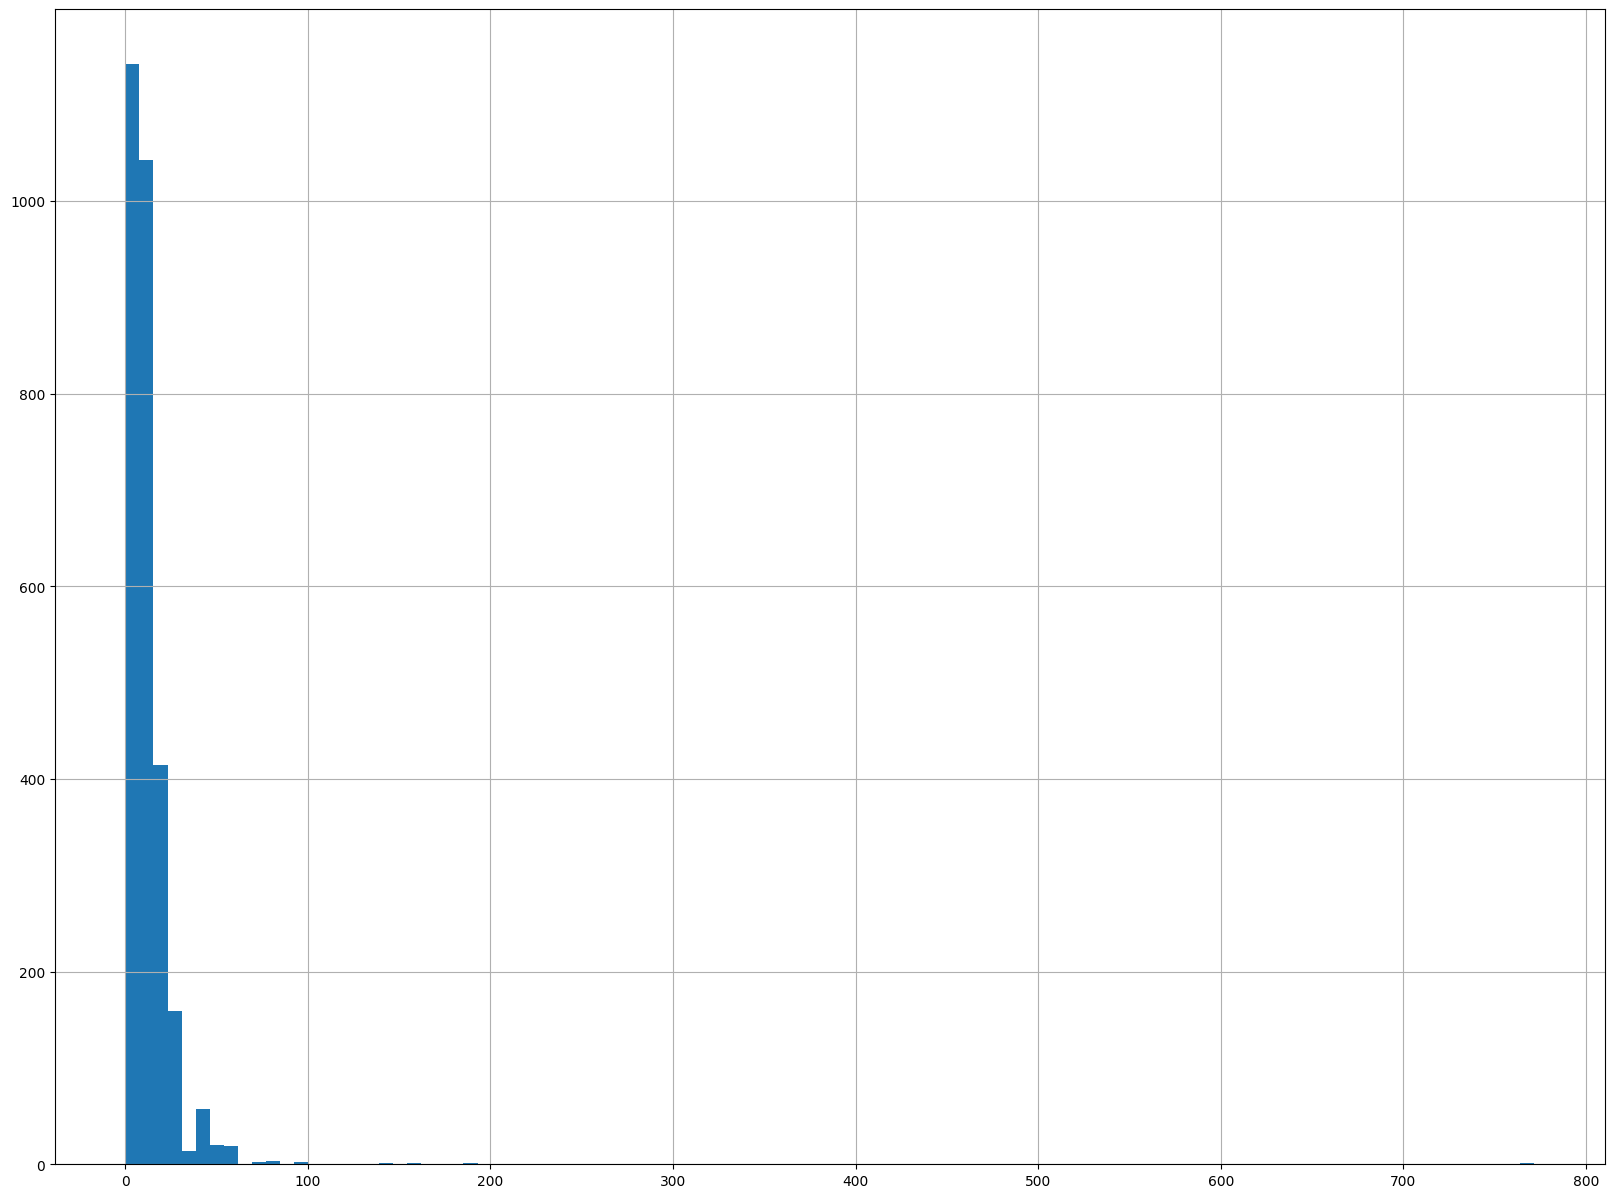

In [72]:
#steam_games['price'].hist()
df_total['price'].hist(bins = 100, figsize= (20,15))

b) boxplot

Text(0.5, 1.0, 'Precio')

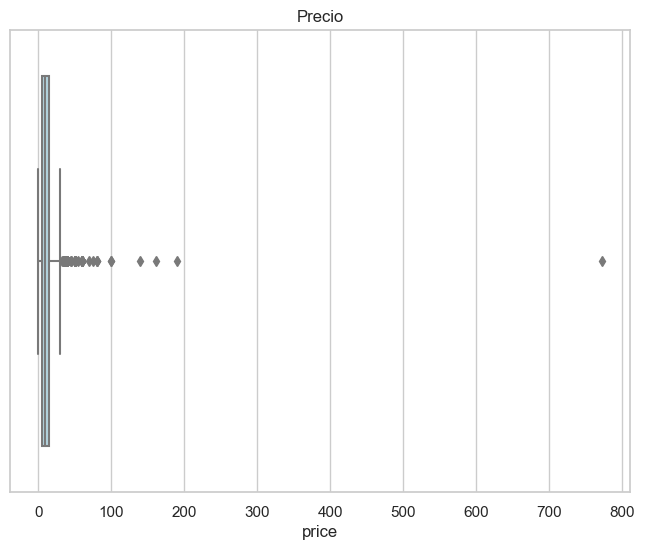

In [74]:
# Crea un boxplot de una columna específica en el DataFrame
sns.set(style="whitegrid")  # Establece el estilo del gráfico
plt.figure(figsize=(8, 6))  # Opcional: establece el tamaño del gráfico

sns.boxplot(data=df_total, x='price', color='lightblue')
plt.title("Precio")


c) plot scatter

[Text(0.5, 0, 'price'), Text(0, 0.5, 'cantidad')]

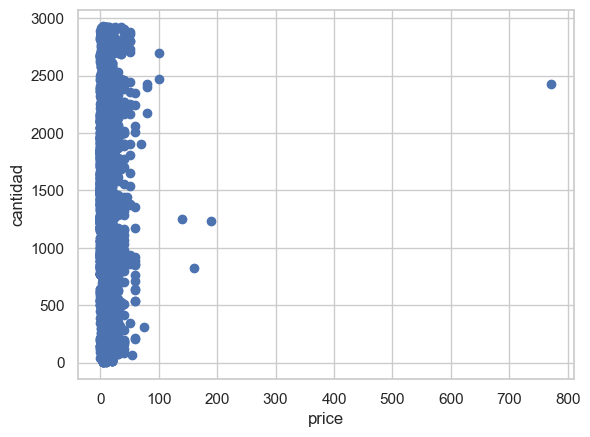

In [75]:
fig = plt.figure()
ax = plt.axes()
# Crea una lista de valores para el eje X
eje_x = list(range(1, len(df_total.price) + 1))

ax.scatter(df_total.price,eje_x)
ax.set(xlabel='price', ylabel='cantidad')

c) convertir a entero e imputar datos

In [76]:
media=df_total.sort_values(by='price')['price'].median()
media

9.99

In [77]:
df_total['price'].fillna(media,inplace=True) # En el EDA se ve que tiene como una distribucion normal por ende se pone la media
df_total['price'] = df_total['price'].astype(float) # Convierto a tipo entero

PUBLISHER str

In [82]:
print('cantidad de nulos: ',df_total['publisher'].isnull().sum())
print('tipo de dato: ',df_total['publisher'].dtype)
print('cantidad datos',df_total.shape)
df_total['publisher'].iloc[1]

cantidad de nulos:  0
tipo de dato:  object
cantidad datos (2928, 22)


'Valve'

In [81]:
#elimino columna que no voy a utilizar
#df_total.drop(columns= '', inplace=True)
#df_total.drop([113310, 113311], inplace=True)
#df_total.dropna(how='all',inplace=True)

# Elimina filas con valores nulos en la columna 'nombre_de_la_columna'
#df_total = df_total.dropna(subset=['publisher'])
df_total['publisher'].fillna('sindato',inplace=True)
df_total['publisher'] = df_total['publisher'].astype(str) # Convierto a tipo string

RELEASE DATE

In [85]:
print('cantidad de nulos: ',df_total['release_date'].isnull().sum())
print('tipo de dato: ',df_total['release_date'].dtype)
print('cantidad datos',df_total.shape)
df_total['release_date'].iloc[0]

cantidad de nulos:  0
tipo de dato:  datetime64[ns]
cantidad datos (2843, 22)


Timestamp('2000-11-01 00:00:00')

In [84]:
df_total['release_date'] = pd.to_datetime(df_total['release_date'], format='%Y-%m-%d', errors='coerce')
df_total = df_total.dropna(subset = ['release_date']) #eliminare los nulos ya que despues no puedo iterar ademas como se vio son poco

Transformaciones Auxiliares

In [86]:
# Extrae el año de la columna "fecha"
df_total['release_year'] = df_total['release_date'].dt.year

USER_ID

In [94]:
print('cantidad de nulos: ',df_total['user_id'].isnull().sum())
print('tipo de dato: ',df_total['user_id'].dtype)
print('cantidad datos',df_total.shape)
df_total['user_id'].iloc[0]

cantidad de nulos:  0
tipo de dato:  object
cantidad datos (2843, 23)


'76561197970982479'

In [93]:
df_total['user_id'].fillna('sinuserid',inplace=True)
df_total['user_id'] = df_total['user_id'].astype(str) # Convierto a tipo string

RECOMEND

In [95]:
print('cantidad de nulos: ',df_total['user_id'].isnull().sum())
print('tipo de dato: ',df_total['user_id'].dtype)
print('cantidad datos',df_total.shape)
df_total['user_id'].iloc[0]

cantidad de nulos:  0
tipo de dato:  bool
cantidad datos (2843, 23)


True

GENRES

In [114]:
print('cantidad de nulos: ',df_total['genres'].isnull().sum())
print('tipo de dato: ',df_total['genres'].dtype)
print('cantidad datos',df_total.shape)
df_total['genres'].iloc[0]

cantidad de nulos:  0
tipo de dato:  object
cantidad datos (2843, 23)


[]

In [113]:
df_total['genres'] = df_total['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else []) # de str -> []
#df_total['genres'].fillna([],inplace=True)
#df_total['genres'] = df_total['genres'].astype(list) # Convierto a tipo string

PLAYTIMEFOREVER

In [115]:
print('cantidad de nulos: ',df_total['playtime_forever'].isnull().sum())
print('tipo de dato: ',df_total['playtime_forever'].dtype)
print('cantidad datos',df_total.shape)
df_total['playtime_forever'].iloc[0]

cantidad de nulos:  0
tipo de dato:  float64
cantidad datos (2843, 23)


6.0

DEVELOPER

In [118]:
print('cantidad de nulos: ',df_total['developer'].isnull().sum())
print('tipo de dato: ',df_total['developer'].dtype)
print('cantidad datos',df_total.shape)
df_total['developer'].iloc[0]

cantidad de nulos:  0
tipo de dato:  object
cantidad datos (2843, 23)


'Valve'

In [117]:
df_total['developer'].fillna('sindev',inplace=True)
df_total['developer'] = df_total['developer'].astype(str) # Convierto a tipo string

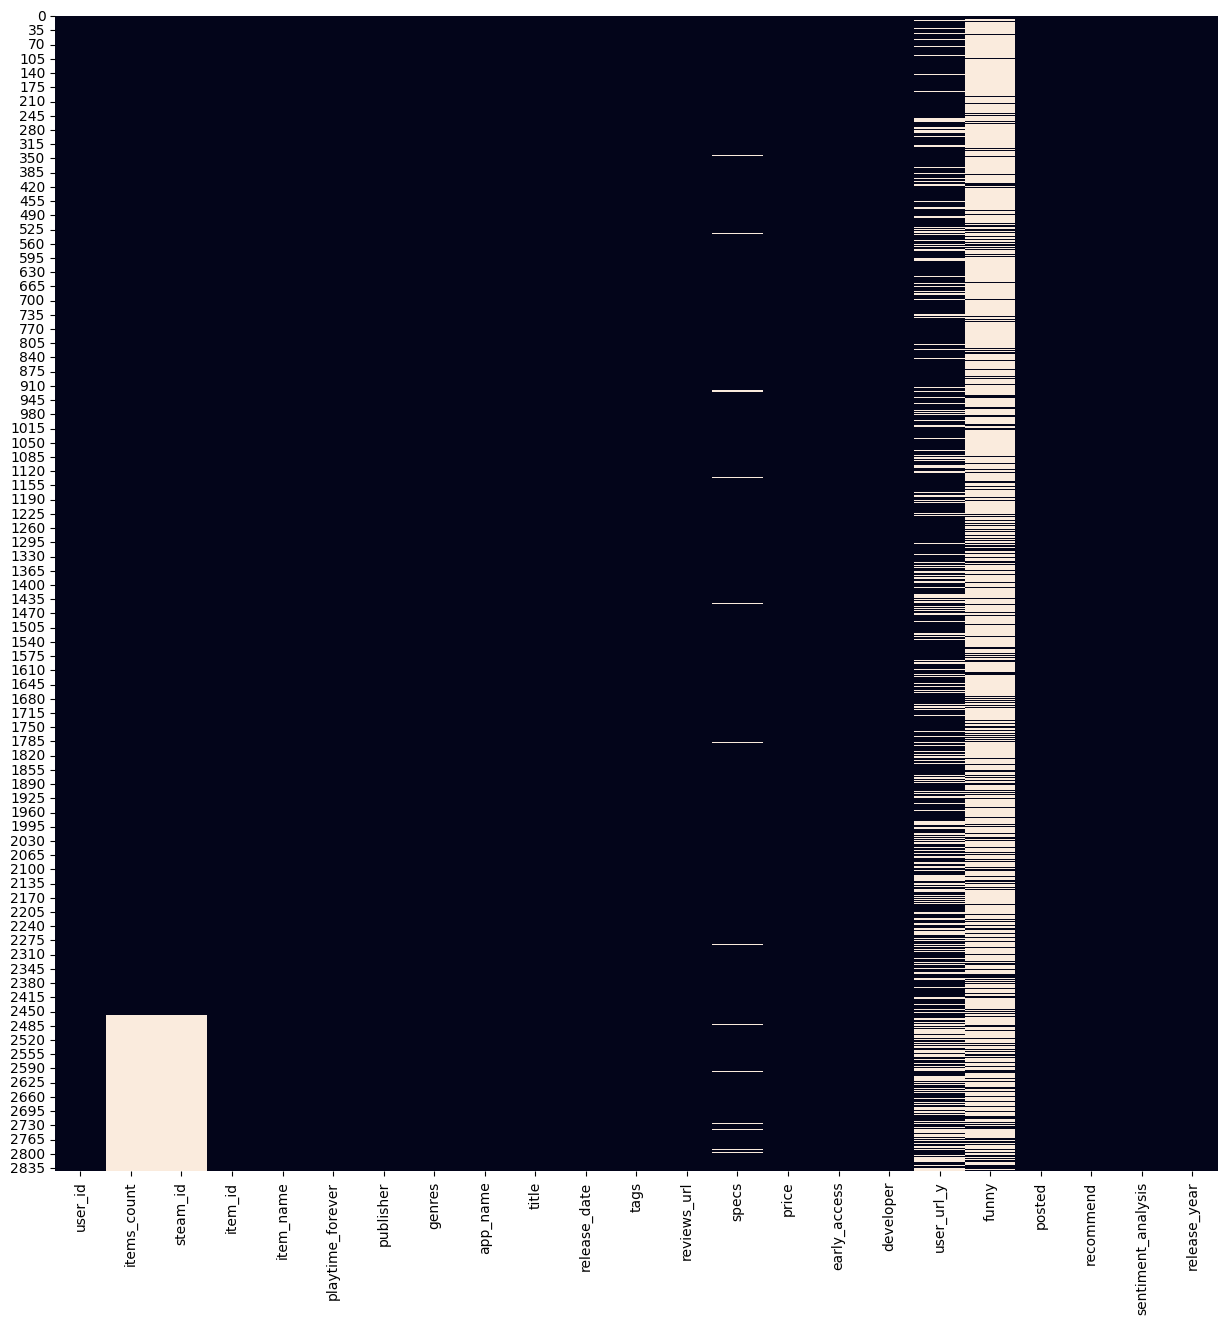

In [62]:
# Reemplazar todos los valores NaN por nan
df_total = df_total.fillna(np.nan)
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_total.isnull(), cbar=False)
plt.show()

# Guardar

In [120]:
df_total.to_csv('consulta1.csv', index=False)

#### Hasta aca los datos limpios

# 1

vamos a ver que valores tenemos de entrada

In [121]:
# Cuenta los valores duplicados en la columna "columna1"
conteo_duplicados = df_total['publisher'].value_counts()
conteo_duplicados

publisher
Ubisoft                66
sindato                55
Square Enix            42
SEGA                   34
Paradox Interactive    33
                       ..
Stout Games             1
treeform                1
Guru Games              1
SnoutUp                 1
TripleBrick             1
Name: count, Length: 1495, dtype: int64

In [122]:
# Agrupado
filtrado=df_total[df_total['publisher']=="Ubisoft"].groupby('release_year')['price'].agg([('Cantidad free',lambda x:(x==0.00).sum()),('Totoal elementos','count')]).reset_index()
filtrado

,release_year,Cantidad free,Totoal elementos
0,2001,0,1
1,2003,0,4
2,2004,0,2
3,2005,0,1
4,2006,0,4
5,2007,0,2
6,2008,0,6
7,2009,0,1
8,2010,1,3
9,2011,0,5


In [123]:
filtrado['porcentaje_free']= filtrado.apply(lambda x:round(x['Cantidad free']/x['Totoal elementos'],2)*100 if x['Totoal elementos']!= 0 else 0,axis=1)
filtrado

,release_year,Cantidad free,Totoal elementos,porcentaje_free
0,2001,0,1,0.0
1,2003,0,4,0.0
2,2004,0,2,0.0
3,2005,0,1,0.0
4,2006,0,4,0.0
5,2007,0,2,0.0
6,2008,0,6,0.0
7,2009,0,1,0.0
8,2010,1,3,33.0
9,2011,0,5,0.0


In [124]:
type(filtrado['release_year'].iloc[0])

numpy.int32

In [125]:
[fila for fila in filtrado['release_year']]

[2001,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

# 2 

vamos a ver que valores tenemos de entrada

In [126]:
# Cuenta los valores duplicados en la columna "columna1"
conteo_duplicados = df_total['user_id'].value_counts()
conteo_duplicados

user_id
sinuserid            385
MrPolicimo             2
camo88                 2
76561198088224663      2
niggerfag              1
                    ... 
Noster69               1
supersushi987          1
76561198080881484      1
76561198038572397      1
nstokesy               1
Name: count, Length: 2456, dtype: int64

In [135]:
filtrado

,user_id,items_count,steam_id,item_id,item_name,playtime_forever,publisher,genres,app_name,title,...,specs,price,early_access,developer,user_url_y,funny,posted,recommend,sentiment_analysis,release_year
1219,camo88,72.0,7.656120e+16,391460.0,WARMODE,30.0,WARTEAM,[],WARMODE,WARMODE,...,"['Multi-player', 'Steam Trading Cards']",0.0,True,WARTEAM,http://steamcommunity.com/id/tyrone266,NaN,"Posted September 18, 2015.",False,2,2015
1220,camo88,72.0,7.656120e+16,413850.0,CS:GO Player Profiles,3.0,sindato,[],CS:GO Player Profiles,CS:GO Player Profiles,...,NaN,0.0,False,sindev,http://steamcommunity.com/id/SALTTHEW0UND,NaN,"Posted December 21, 2015.",True,1,2015


In [133]:
# Agrupado
filtrado=df_total[df_total['user_id']=="camo88"]

gastado=filtrado['price'].sum()
gastado

0.0

In [134]:
cantidad_items=filtrado.shape[0]
cantidad_items

2

In [137]:
positivo=[reco for reco in filtrado['recommend'] if reco==True]
cant_pos=len(positivo)
cant_pos

1

In [138]:
porcentaje=cant_pos/cantidad_items
porcentaje

0.5

# 3

vemos los valores de entrada 

In [139]:
# Cuenta los valores duplicados en la columna "columna1"
conteo_duplicados = df_total['genres'].value_counts()
conteo_duplicados

genres
[]    2843
Name: count, dtype: int64

In [140]:
df_total['genres']

0       []
1       []
2       []
3       []
4       []
        ..
2923    []
2924    []
2925    []
2926    []
2927    []
Name: genres, Length: 2843, dtype: object

In [ ]:
# Agrupado
filtrado=df_total['action' in df_total['user_id']]

gastado=filtrado['price'].sum()
gastado

In [ ]:
usuarioM=

# 4

In [60]:
df_total = pd.read_csv(r"consulta1.csv")

valores de entrada

In [5]:
# Cuenta los valores duplicados en la columna "columna1"
conteo_duplicados = df_total['release_year'].value_counts()
conteo_duplicados

release_year
2015    632
2014    529
2016    391
2013    319
2012    215
2011    158
2010    106
2009     89
2008     63
2007     50
2017     50
2006     49
2005     32
2003     27
2004     25
2001     17
1998     14
2002     14
1997     13
1999     13
2000     11
1994      6
1995      5
1996      5
1993      3
1992      3
1990      2
1991      1
1989      1
Name: count, dtype: int64

In [143]:
cantidad_items=df_total.shape[0]
positivo=[reco for reco in df_total['recommend'] if reco==True]
cant_pos=len(positivo)
porcentaje=cant_pos/cantidad_items
porcentaje

0.8083010903974674

,release_year,cantidad,user_id,cantidad_pos
0,1989,1,76561198002435405,1
1,1990,2,76561198033246452,1
2,1990,2,Scooterinooo,1
3,1991,1,76561198090724989,1
4,1992,3,76561198059432403,1
...,...,...,...,...
2469,2017,50,gusso10_,1
2470,2017,50,limlolhao,1
2471,2017,50,sinuserid,7
2472,2017,50,thor2424,1


In [15]:
cantpos = df_total.groupby(['release_year','developer'])['recommend'].agg([('cantidad_pos',lambda x:(x==True).count())])
cantpos=cantpos.reset_index()
cantpos

,release_year,developer,cantidad_pos
0,1989,"MicroProse Software, Inc",1
1,1990,LucasArts,1
2,1990,id Software,1
3,1991,3D Realms (Apogee Software),1
4,1992,3D Realms (Apogee Software),1
...,...,...,...
2620,2017,Targem Games,1
2621,2017,"Tlön Studios,Ilex Games",1
2622,2017,Trendy Entertainment,1
2623,2017,Wolfire Games,1


In [11]:
top_developers = df_total.groupby('release_year')['user_id'].agg([('cantidad','count')])
top_developers=top_developers.reset_index()
top_developers

,release_year,cantidad
0,1989,1
1,1990,2
2,1991,1
3,1992,3
4,1993,3
5,1994,6
6,1995,5
7,1996,5
8,1997,13
9,1998,14


In [16]:
# Combinar DataFrames utilizando 'merge'
resultado = top_developers.merge(cantpos, on='release_year', how='outer')
resultado

,release_year,cantidad,developer,cantidad_pos
0,1989,1,"MicroProse Software, Inc",1
1,1990,2,LucasArts,1
2,1990,2,id Software,1
3,1991,1,3D Realms (Apogee Software),1
4,1992,3,3D Realms (Apogee Software),1
...,...,...,...,...
2620,2017,50,Targem Games,1
2621,2017,50,"Tlön Studios,Ilex Games",1
2622,2017,50,Trendy Entertainment,1
2623,2017,50,Wolfire Games,1


In [17]:
resultado['total']=resultado['cantidad_pos']/resultado['cantidad']
resultado

,release_year,cantidad,developer,cantidad_pos,total
0,1989,1,"MicroProse Software, Inc",1,1.000000
1,1990,2,LucasArts,1,0.500000
2,1990,2,id Software,1,0.500000
3,1991,1,3D Realms (Apogee Software),1,1.000000
4,1992,3,3D Realms (Apogee Software),1,0.333333
...,...,...,...,...,...
2620,2017,50,Targem Games,1,0.020000
2621,2017,50,"Tlön Studios,Ilex Games",1,0.020000
2622,2017,50,Trendy Entertainment,1,0.020000
2623,2017,50,Wolfire Games,1,0.020000


In [18]:
resultado=resultado.sort_values(by='total', ascending=False)
resultado

,release_year,cantidad,developer,cantidad_pos,total
0,1989,1,"MicroProse Software, Inc",1,1.000000
3,1991,1,3D Realms (Apogee Software),1,1.000000
1,1990,2,LucasArts,1,0.500000
2,1990,2,id Software,1,0.500000
18,1995,5,id Software,2,0.400000
...,...,...,...,...,...
1966,2015,632,Offworld Industries,1,0.001582
1967,2015,632,OhNoo Studio,1,0.001582
1968,2015,632,"Olde Sküül,Sculptured Software",1,0.001582
1969,2015,632,Orange_Juice,1,0.001582


In [22]:
resultado.iloc[0]['total']*100

100.0

In [48]:
filtro=resultado[resultado['release_year']==1990]
filtro

,release_year,cantidad,developer,cantidad_pos,total
1,1990,2,LucasArts,1,0.5
2,1990,2,id Software,1,0.5


In [65]:
try:
    # Código que puede generar una excepción
    dev1=filtro.iloc[0]['developer']
    dev2=filtro.iloc[10]['developer']
except Exception as e:
    # Manejo de cualquier otra excepción no especificada anteriormente
    dev1='ninguno'
    dev2='ninguno'
    print("Ocurrió un error:", e)

Ocurrió un error: single positional indexer is out-of-bounds


In [66]:
dev1

'ninguno'

In [39]:
filtro.iloc[1]

release_year           1990
cantidad                  2
developer       id Software
cantidad_pos              1
total                   0.5
Name: 2, dtype: object

In [142]:
# Calculo auxiliar
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'año': [2019, 2019, 2019,2020, 2020, 2021, 2021],
    'desarrollador': ['Alice', 'Alice','Bob', 'Alice', 'Charlie', 'Bob', 'Charlie'],
    'horas_trabajadas': [40, 30,35, 45, 50, 35, 55]
}

df = pd.DataFrame(data)

# Agrupar por año y desarrollador y calcular la suma de horas trabajadas
resultados = df.groupby(['año', 'desarrollador'])['horas_trabajadas'].sum().reset_index()

# Imprimir el resultado
print(resultados)

    año desarrollador  horas_trabajadas
0  2019         Alice                70
1  2019           Bob                35
2  2020         Alice                45
3  2020       Charlie                50
4  2021           Bob                35
5  2021       Charlie                55


# 5

Valores de entrada

In [54]:
# Cuenta los valores duplicados en la columna "columna1"
conteo_duplicados = df_total['developer'].value_counts()
conteo_duplicados

developer
sindev             46
Valve              21
id Software        15
Telltale Games     14
Square Enix        12
                   ..
Carbon Games        1
KOG                 1
Critical Studio     1
U.S. Army           1
TripleBrick         1
Name: count, Length: 2057, dtype: int64

In [55]:
filtrado= df_total[df_total['developer']=='sindev']

In [56]:

category_counts={}
for category in filtrado['sentiment_analysis']:
    category_counts[category]=category_counts.get(category,0)+1

In [59]:
category_counts[0]

8